In [1]:
#LYFT and uber price prediction
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
rides_df = pd.read_csv('f:\cab_rides.csv')

In [4]:
rides_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
rides_df.tail(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693061,1.61,Uber,1.543730e+12,Haymarket Square,Theatre District,15.0,1.0,54362c72-124b-47e8-8d07-62a07cfff624,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693062,1.61,Uber,1.543730e+12,Haymarket Square,Theatre District,15.0,1.0,64a50889-d05b-49de-b416-1802db5c27ac,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693063,1.61,Uber,1.543730e+12,Haymarket Square,Theatre District,27.0,1.0,6c1d9207-a9af-431e-a65f-3d9d205f28bf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693064,1.00,Uber,1.543730e+12,North End,West End,17.0,1.0,25ed29df-4f9c-4aac-8218-681427f1d738,6c84fd89-3f11-4782-9b50-97c468b19529,Black
693065,1.00,Uber,1.543710e+12,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1.543710e+12,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1.543710e+12,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1.543710e+12,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1.543710e+12,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693070,1.00,Uber,1.543710e+12,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


In [6]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(4), object(6)
memory usage: 52.9+ MB


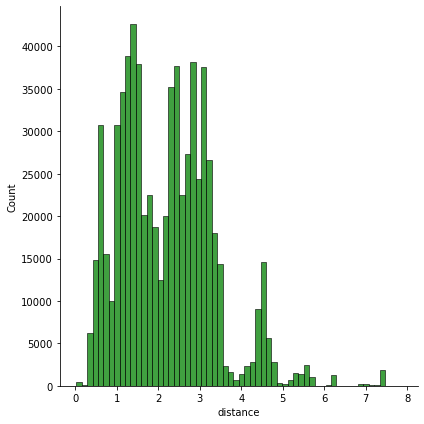

In [8]:
#distance
sns.displot(data=rides_df, x='distance', bins=60, color='green', height=6)

<AxesSubplot:xlabel='price', ylabel='Density'>

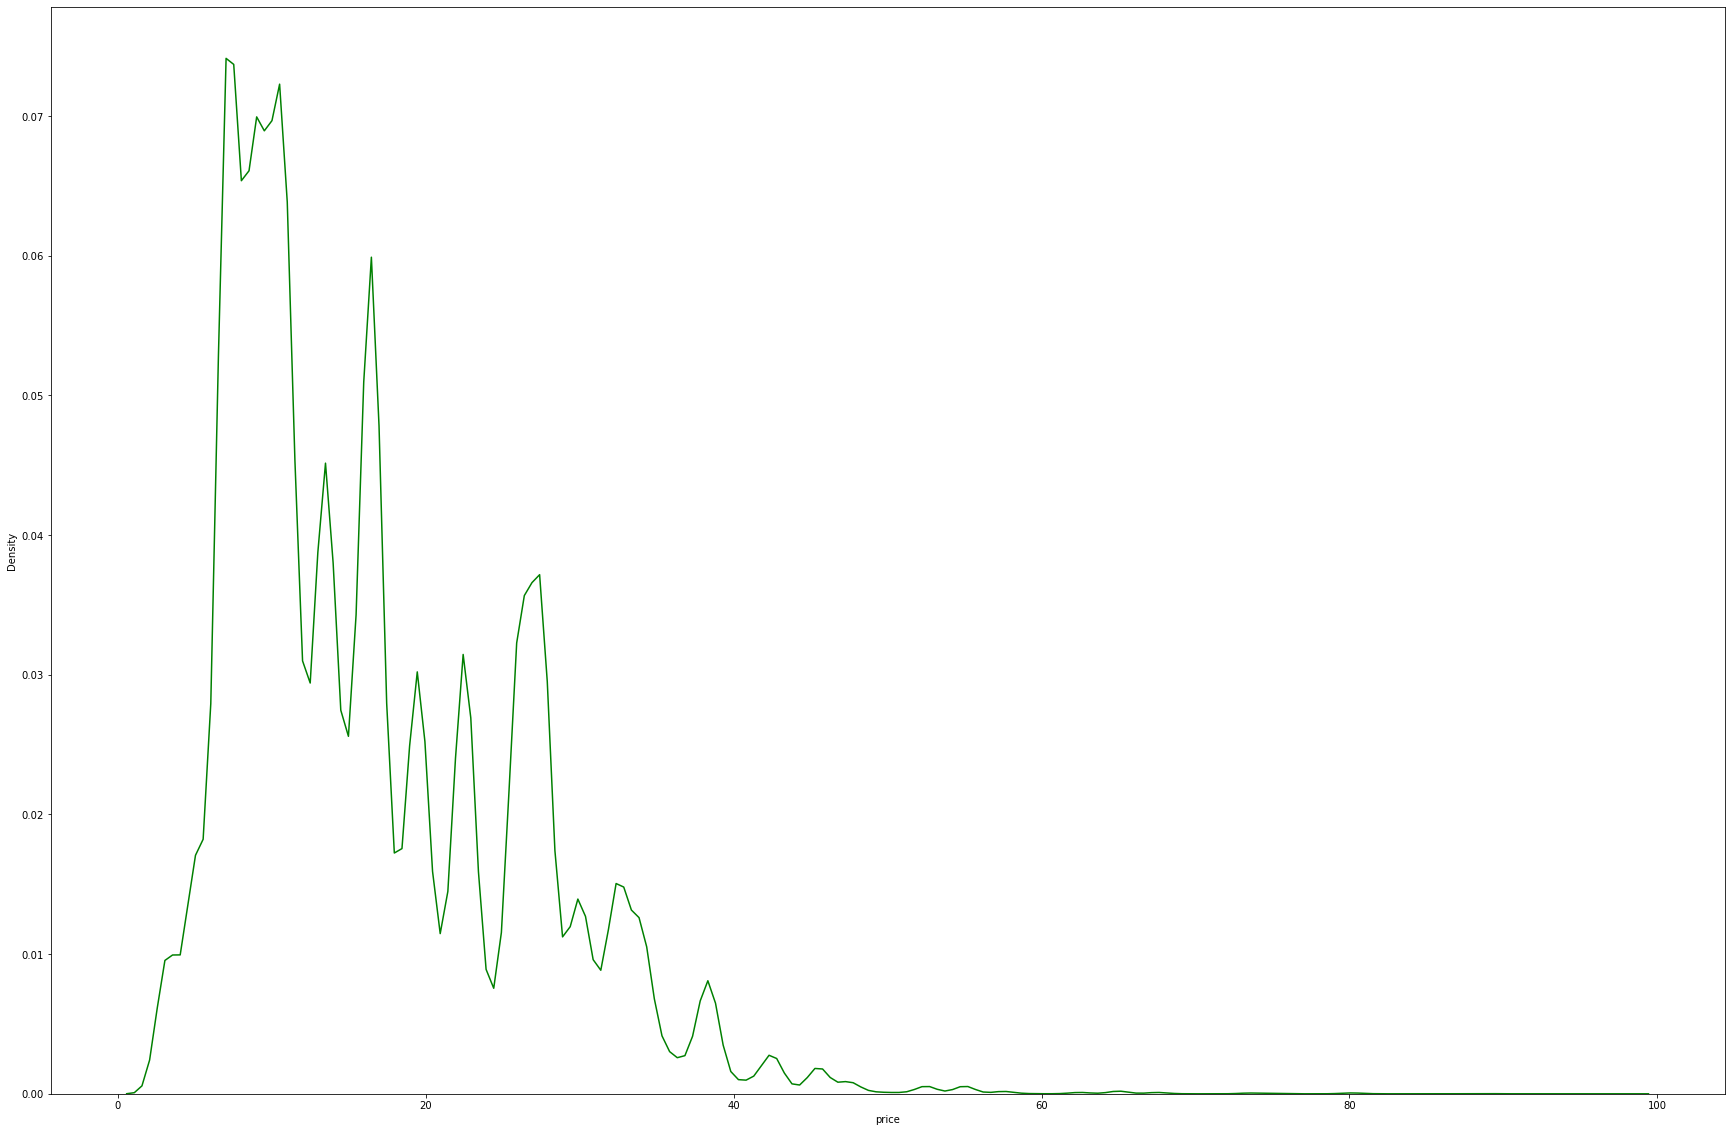

In [9]:
#price view

plt.figure(figsize=(30,20))
sns.kdeplot(data=rides_df, x='price', color='green', weights=20, levels=10, thresh=10)

<AxesSubplot:xlabel='distance', ylabel='price'>

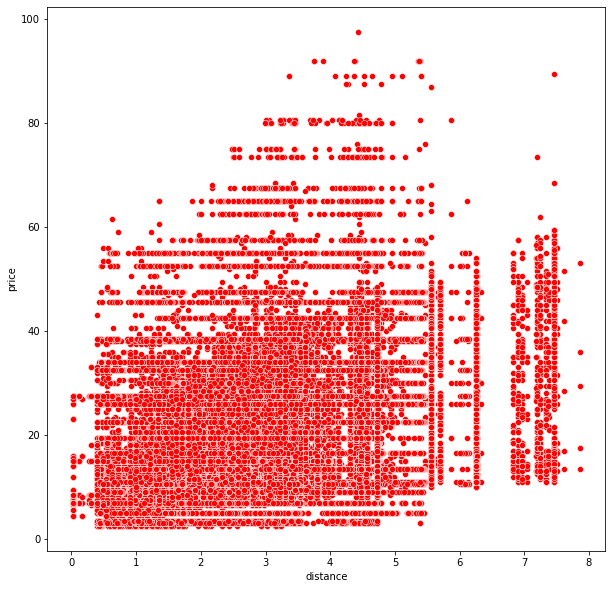

In [17]:
#distance and price relation
plt.figure(figsize=(10,10))
sns.scatterplot(data=rides_df, x='distance', y='price', sizes=10,color='red')

In [18]:
#heatmap for price
heatmap= rides_df.pivot_table(index='name', columns='destination', values='price')


In [19]:
heatmap

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
name,,,,,,,,,,,,
Black,19.941394,20.093579,23.733181,22.831083,22.339558,17.365883,18.286259,20.770755,22.591374,18.972113,19.267195,20.070369
Black SUV,29.574510,29.736906,32.426083,31.517861,33.310474,27.759199,28.422583,31.071885,31.398170,28.887582,29.142330,30.158193
Lux,17.484561,17.253652,21.248067,20.330094,19.337640,14.387679,15.962286,18.191187,19.498244,14.753513,17.351856,17.416804
Lux Black,22.135322,22.321748,27.596861,26.054098,25.485365,19.157426,20.320684,23.735963,24.960070,19.992623,22.238839,22.691457
Lux Black XL,31.590409,31.152215,36.524209,35.123302,35.433227,28.811548,29.757906,33.321369,34.295515,29.051171,30.985667,31.765086
Lyft,9.243392,9.476673,11.074139,10.682670,10.568260,8.120836,8.599672,9.761549,10.353391,8.522096,9.405075,9.499647
Lyft XL,15.016374,14.984802,18.240689,17.343208,16.882575,12.587046,13.531038,15.512438,16.735972,12.766745,15.007166,15.064486
Shared,5.870058,6.100495,7.226751,6.823770,6.264578,4.923500,5.327711,6.093817,6.640900,5.201405,5.864427,6.016121
UberPool,8.873203,8.727313,9.969077,9.298192,8.845568,7.922491,8.231758,8.412373,9.561860,8.297559,8.547092,8.338316


<AxesSubplot:xlabel='destination', ylabel='name'>

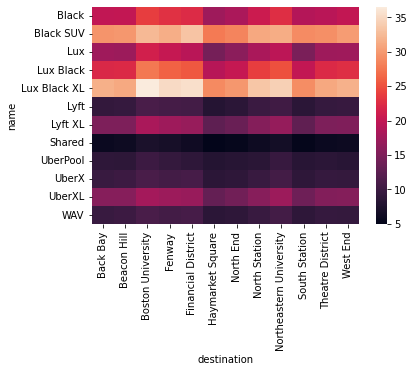

In [20]:
sns.heatmap(heatmap)